In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

📜 Classification Report (Epochs):
               precision    recall  f1-score   support

      Baroque       0.10      0.09      0.10        88
   Classicism       0.09      0.12      0.10        90
 Contemporary       0.13      0.14      0.13        85
Enlightenment       0.11      0.12      0.12        90
     Medieval       0.12      0.12      0.12        80
    Modernism       0.07      0.11      0.09        74
Postmodernism       0.06      0.06      0.06        87
      Realism       0.07      0.06      0.06        89
  Renaissance       0.11      0.06      0.08       108
  Romanticism       0.03      0.02      0.03        84

     accuracy                           0.09       875
    macro avg       0.09      0.09      0.09       875
 weighted avg       0.09      0.09      0.09       875



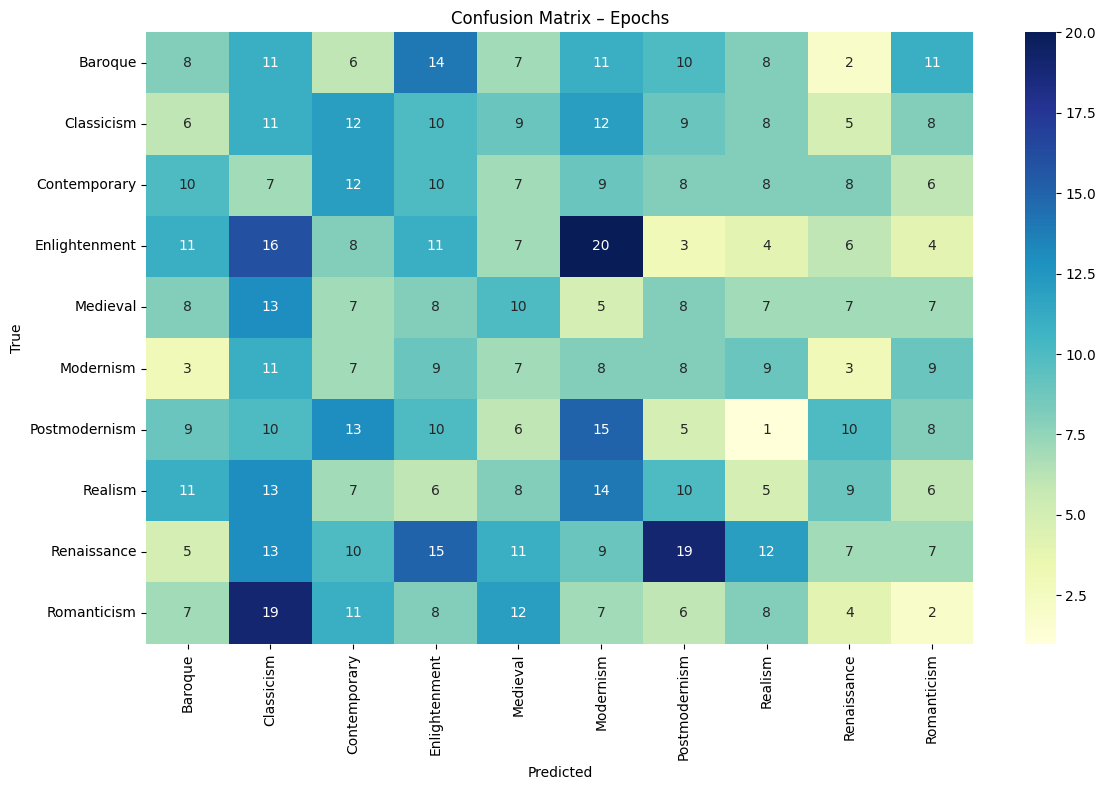

In [5]:
df = pd.read_csv("Poetry_Data_with_Epochs.csv")

# === Фільтруємо епохи, які мають більше 1 прикладу ===
epoch_counts = df["epoch"].value_counts()
valid_epochs = epoch_counts[epoch_counts > 1].index
df_filtered = df[df["epoch"].isin(valid_epochs)].copy()

# === Підготовка ознак і цілі ===
X = df_filtered.drop(columns=["filename", "author", "epoch"]).fillna(0)
y = df_filtered["epoch"]

# === Масштабування ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Розділення і навчання ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Прогноз і звіт ===
y_pred = clf.predict(X_test)
print("📜 Classification Report (Epochs):")
print(classification_report(y_test, y_pred))

# === Матриця помилок ===
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d",
            xticklabels=clf.classes_, yticklabels=clf.classes_, cmap="YlGnBu")
plt.title("Confusion Matrix – Epochs")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()